In [1]:
from src.utils import *
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
images = []
image1 = cv2.imread("Dataset_CvDl_Hw1/Q4_Image/Left.jpg") 
image2 = cv2.imread("Dataset_CvDl_Hw1/Q4_Image/Right.jpg")
images.append(image1)
images.append(image2)

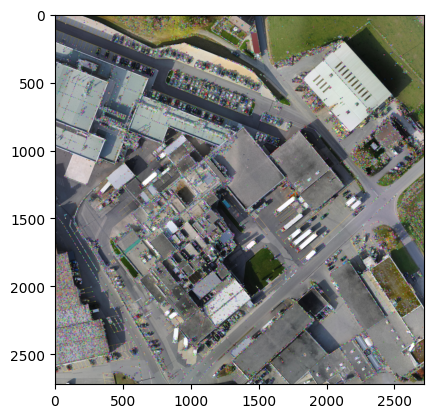

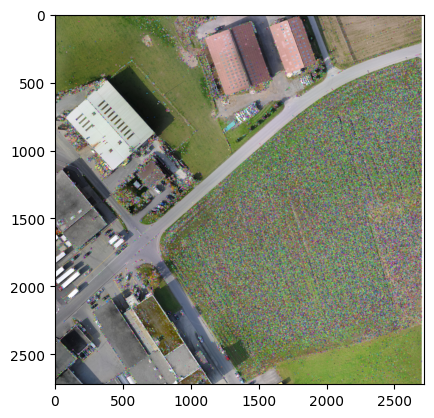

In [7]:
detector, matcher = init_feature("brisk")

keypoints = []
descriptors = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # keypoint, descriptor = sift.detectAndCompute(gray, None)
    keypoint, descriptor = detector.detectAndCompute(gray, None)
    # keypoint = sift.detect(gray, None)
    keypoints.append(keypoint)
    descriptors.append(descriptor)
    image_sift = cv2.drawKeypoints(image.copy(), keypoint, image.copy())
    image_sift = cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB)
    plt.imshow(image_sift)
    plt.show()

8001 / 8208  inliers/matched


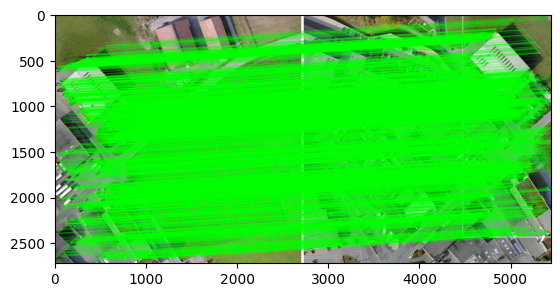

In [10]:
desc_1, desc_2 = descriptors[:2]
key_1, key_2 = keypoints[:2]
img_1, img_2 = images[:2]

raw_matches = matcher.knnMatch(desc_2, desc_1, k=2)

point_2, point_1, keypoint_pairs = filter_matches(key_2, key_1, raw_matches)

if len(point_1) >=4:
    H, status = cv.findHomography(point_2, point_1, cv.RANSAC, 5.0)
    print('{} / {}  inliers/matched'.format(np.sum(status), len(status)))
else:
    H, status = None, None
homography = H

image_match = explore_match(img_2, img_1, keypoint_pairs, status, H)

image_match = cv2.cvtColor(image_match, cv2.COLOR_BGR2RGB)
plt.imshow(image_match)
plt.show()

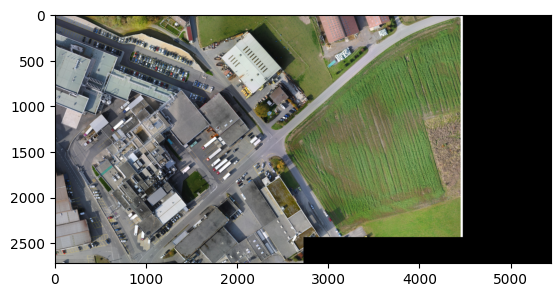

In [9]:
img1 = images[0]
img2 = images[1]

h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

if homography is not None:
    warp_image = cv2.warpPerspective(img2, homography, (w1+w2, max(h1, h2)))
    warp_image[:h1, :w1] = img1
    warp_image = cv2.cvtColor(warp_image, cv2.COLOR_BGR2RGB)
    plt.imshow(warp_image)
    plt.show()